# Problem Set 4
Coded by Kathryn Brusewitz

In [1]:
# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)
import scipy.stats as st

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)
import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy.stats import linregress

from matplotlib.colors import ListedColormap
from sklearn import neighbors

import seaborn as sns
sns.set(style="ticks")

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

Numpy version:        1.13.3
SciPy version:        0.19.1
Pandas version:       0.20.3
Maplotlib version:     2.1.0
Scikit-Learn version: 0.19.1


/Users/kathryn/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/kathryn/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load in data
df = pd.DataFrame.from_csv('wdbc.csv', sep=',', header=0, index_col=None).drop(['id'], axis=1)

# Change diagnosis attribute to booleans: 1 for M, 0 for B
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0)

## Summary Table

In [3]:
print("Summary table: means, ranges, and number of missings for each variable.")
summary = df.describe().T[['min', 'max', 'mean']]
summary['missing'] = df.isnull().sum()

# Initialize empty columns
summary['slope'] = ''
summary['intercept'] = ''
summary['rvalue'] = ''
summary['abs-rvalue'] = ''
summary['pvalue'] = ''
summary['stderr'] = ''

# Add correlation between diagnosis and corresponding feature
for i in df.columns:
    model = linregress(df['diagnosis'], df[i])
    summary.loc[i, ['slope']] = model[0]
    summary.loc[i, ['intercept']] = model[1]
    summary.loc[i, ['rvalue']] = model[2]
    summary.loc[i, ['abs-rvalue']] = abs(model[2])
    summary.loc[i, ['pvalue']] = model[3]
    summary.loc[i, ['stderr']] = model[4]

# Show largest rvalues first
summary.sort_values('abs-rvalue', ascending=False)


Summary table: means, ranges, and number of missings for each variable.


,min,max,mean,missing,slope,intercept,rvalue,abs-rvalue,pvalue,stderr
diagnosis,0.000000,1.00000,0.372583,0,1,0,1,1,0,0
concpoints.worst,0.000000,0.29100,0.114606,0,0.107793,0.0744443,0.793566,0.793566,1.9691e-124,0.00347108
perimeter.worst,50.410000,251.20000,107.261213,0,54.3644,87.0059,0.782914,0.782914,5.7714e-119,1.81422
concpoints.mean,0.000000,0.20120,0.048919,0,0.0622726,0.0257174,0.776614,0.776614,7.10115e-116,0.00212141
radius.worst,7.930000,36.04000,16.269190,0,7.75501,13.3798,0.776454,0.776454,8.48229e-116,0.264324
perimeter.mean,43.790000,188.50000,91.969033,0,37.29,78.0754,0.742636,0.742636,8.43625e-101,1.41222
area.worst,185.200000,4254.00000,880.583128,0,863.387,558.899,0.733825,0.733825,2.82885e-97,33.5666
radius.mean,6.981000,28.11000,14.127292,0,5.31631,12.1465,0.730029,0.730029,8.46594e-96,0.209009
area.mean,143.500000,2501.00000,654.889104,0,515.586,462.79,0.708984,0.708984,4.73456e-88,21.5378
concavity.mean,0.000000,0.42680,0.088799,0,0.114717,0.0460576,0.69636,0.69636,9.96656e-84,0.00496526


## Graphical Exploration
Scatterplots exploring relationship between features and diagnosis

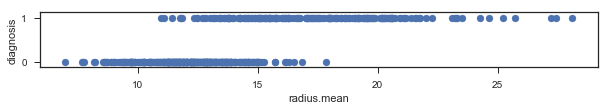

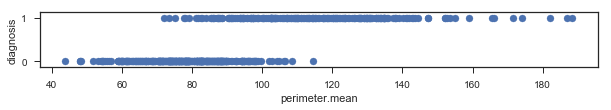

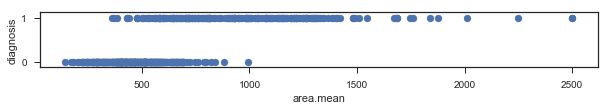

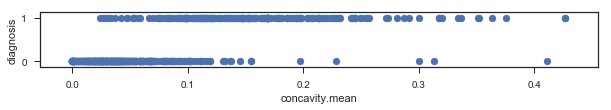

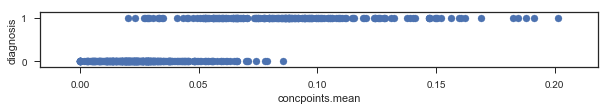

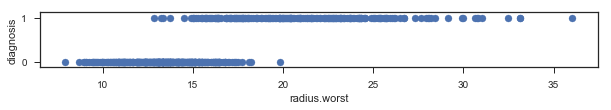

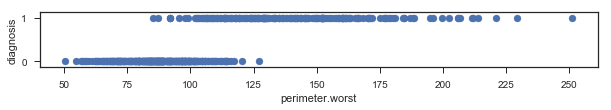

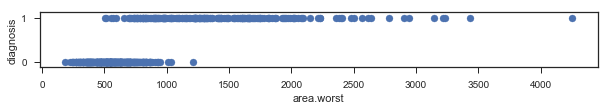

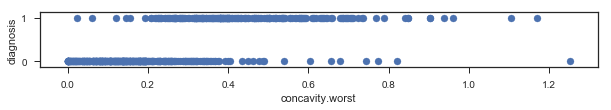

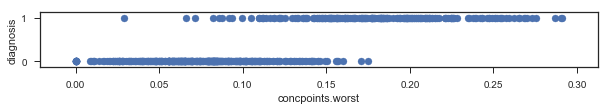

In [4]:
# for each feature
for i in df.columns:
    # skip the diagnosis feature
    if (i != 'diagnosis'):
        # Only show plots where there is higher correlation (absolute val of r > 0.6)
        if ((summary.loc[i, ['abs-rvalue']].astype(float) > 0.6).bool()):
            plt.figure(figsize = (10, 1))
            plt.scatter(df[i], df['diagnosis'])
            plt.xlabel(i)
            plt.ylabel('diagnosis')
            plt.show()


## 2.1 Decision Boundary: kNN Case
### Features: concpoints.mean and perimeter.worst

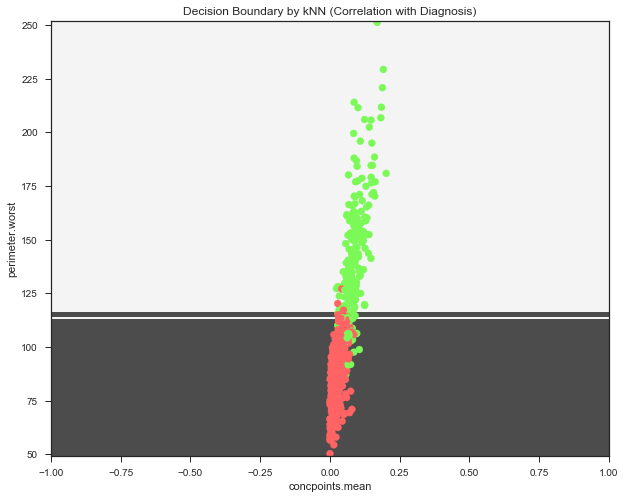

In [5]:
# Explanatory variables (features)
expVar1 = 'concpoints.mean'
expVar2 = 'perimeter.worst'

h = 0.5
x = df[[expVar1, expVar2]]
y = df['diagnosis']

clf = neighbors.KNeighborsClassifier(4) # k=4
clf.fit(x, y)

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicted values
Z = clf.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])
Z = Z.reshape(xx.shape)

# Color codes for predicted values
scattercmap = ListedColormap(['#ff6363', '#7af957']) 
colormesh = ListedColormap(['#4c4c4c', '#f4f4f4'])

# Plot the actual data and decision boundary
plt.figure(figsize=(10,8))
plt.title("Decision Boundary by kNN (Correlation with Diagnosis)")
plt.xlabel(expVar1)
plt.ylabel(expVar2)

plt.pcolormesh(xx, yy, Z, cmap=colormesh)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=scattercmap, label=(expVar1, expVar2))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### 2.1 Observations 

The background is kNN's predictions (or rather, decision boundary). The scatterplot is the actual data. kNN is pretty good. It shows a divide right about where the `concpoints.mean` and `perimeter.worst` data meet and overlap. 

kNN does seem to pick up some noise. The extra bar in the middle seem to pick up noise from a few `concpoints.mean` data.

## 2.2 Decision Boundary: Logistic Regression
### Features: concpoints.mean and perimeter.worst
Is a given diagnosis M (malignant cancer) or B (benign cancer) based on its concpoints.mean and perimeter.worst?

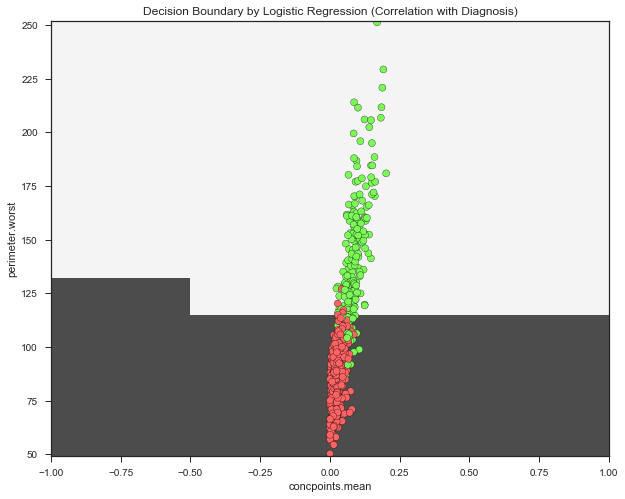

In [6]:
logistic = LogisticRegression()

# Explanatory variables (features)
expVar1 = 'concpoints.mean'
expVar2 = 'perimeter.worst'

h = 0.5
x = df[[expVar1, expVar2]]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Fit the LogisticRegression instance
logistic = logistic.fit(x_train, y_train)

# Uncomment below to view more information about the logistic regression
# print('Estimated coefficients: ', logistic.coef_)
# print('Predicted class: ', logistic.predict(x_test))
# print('Prediction accuracy: ', logistic.score(x_test, y_test))
# print('Prediction precision: ', cross_val_score(logistic, x_train, y_train, cv=10, scoring='precision'))
# print('Prediction recall: ', cross_val_score(logistic, x_train, y_train, cv=10, scoring='recall'))

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicted values
Z = logistic.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])
Z = Z.reshape(xx.shape)

# Color codes for predicted values
scattercmap = ListedColormap(['#ff6363', '#7af957'])
colormesh = ListedColormap(['#4c4c4c', '#f4f4f4'])

# Plot
plt.figure(figsize=(10,8))
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel(expVar1)
plt.ylabel(expVar2)

plt.pcolormesh(xx, yy, Z, cmap=colormesh)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### 2.2 Observations 

The background is logistic regression's predictions (or rather, decision boundary). The scatterplot is the actual data. It shows a divide right about where the concpoints.mean and perimeter.worst data meet and overlap. 

Not quite sure if logistic regression is better than kNN here. Though one could make the argument that logistic regression seems more precise as there is no extra "bar(s)" around the decision boundary picking up noise from data.

## 2.3 Decision Boundary: Feature Engineering
### Original Features: concpoints.mean and perimeter.worst defined x and y

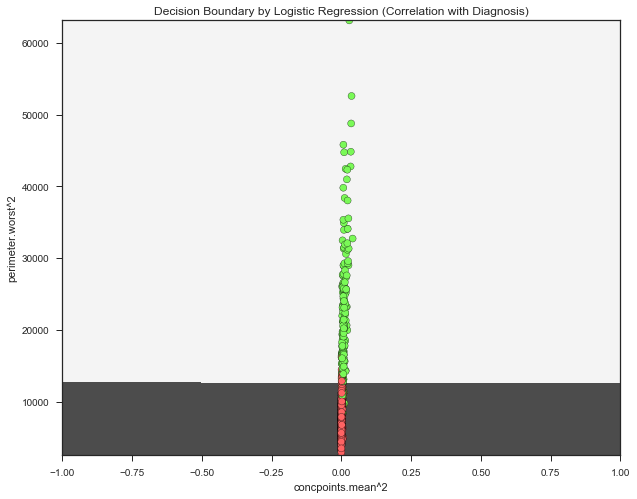

In [7]:
# Explanatory variables (features)
expVar1 = 'concpoints.mean'
expVar2 = 'perimeter.worst'
expVar3 = 'concpoints.mean^2'
expVar4 = 'perimeter.worst^2'

# Original and new features
df[expVar3] = df[expVar1]**2
df[expVar4] = df[expVar2]**2

logistic = LogisticRegression()

h = 0.5
x = df[[expVar3, expVar4]]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Fit the LogisticRegression instance
logistic = logistic.fit(x_train, y_train)

# Uncomment below to view more information about the logistic regression
# print('Estimated coefficients: ', logistic.coef_)
# print('Predicted class: ', logistic.predict(x_test))
# print('Prediction accuracy: ', logistic.score(x_test, y_test))
# print('Prediction precision: ', cross_val_score(logistic, x_train, y_train, cv=10, scoring='precision'))
# print('Prediction recall: ', cross_val_score(logistic, x_train, y_train, cv=10, scoring='recall'))

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicted values
Z = logistic.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])
Z = Z.reshape(xx.shape)

# Color codes for predicted values
scattercmap = ListedColormap(['#ff6363', '#7af957'])
colormesh = ListedColormap(['#4c4c4c', '#f4f4f4'])

# Plot
plt.figure(figsize=(10,8))
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel(expVar3)
plt.ylabel(expVar4)

plt.pcolormesh(xx, yy, Z, cmap=colormesh)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


### Original Features: concpoints.worst and radius.worst defined x and y

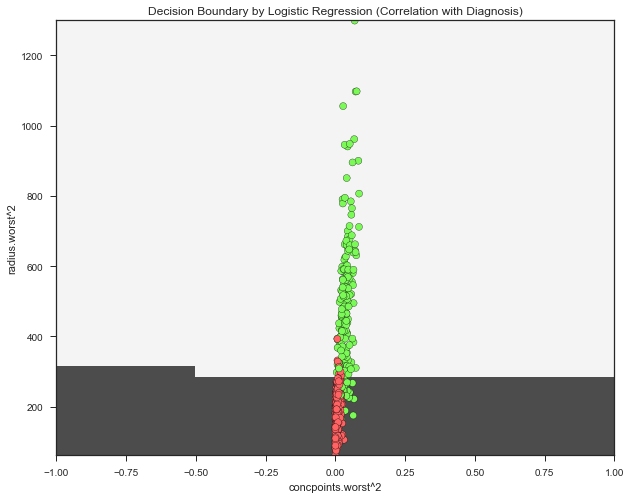

In [8]:
# Explanatory variables (features)
expVar1 = 'concpoints.worst'
expVar2 = 'radius.worst'
expVar3 = 'concpoints.worst^2'
expVar4 = 'radius.worst^2'

# Original and new features
df[expVar3] = df[expVar1]**2
df[expVar4] = df[expVar2]**2

logistic = LogisticRegression()

h = 0.5
x = df[[expVar3, expVar4]]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Fit the LogisticRegression instance
logistic = logistic.fit(x_train, y_train)

# Uncomment below to view more information about the logistic regression
# print('Estimated coefficients: ', logistic.coef_)
# print('Predicted class: ', logistic.predict(x_test))
# print('Prediction accuracy: ', logistic.score(x_test, y_test))
# print('Prediction precision: ', cross_val_score(logistic, x_train, y_train, cv=10, scoring='precision'))
# print('Prediction recall: ', cross_val_score(logistic, x_train, y_train, cv=10, scoring='recall'))

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicted values
Z = logistic.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])
Z = Z.reshape(xx.shape)

# Color codes for predicted values
scattercmap = ListedColormap(['#ff6363', '#7af957'])
colormesh = ListedColormap(['#4c4c4c', '#f4f4f4'])

# Plot
plt.figure(figsize=(10,8))
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel(expVar3)
plt.ylabel(expVar4)

plt.pcolormesh(xx, yy, Z, cmap=colormesh)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


### Original Features: concpoints.worst and perimeter.worst defined x and y

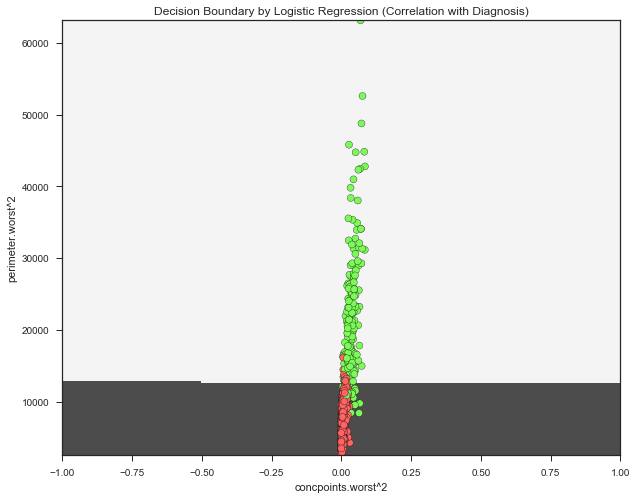

In [9]:
# Explanatory variables (features)
expVar3 = 'concpoints.worst^2'
expVar4 = 'perimeter.worst^2'

logistic = LogisticRegression()

h = 0.5
x = df[[expVar3, expVar4]]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Fit the LogisticRegression instance
logistic = logistic.fit(x_train, y_train)

# Uncomment below to view more information about the logistic regression
# print('Estimated coefficients: ', logistic.coef_)
# print('Predicted class: ', logistic.predict(x_test))
# print('Prediction accuracy: ', logistic.score(x_test, y_test))
# print('Prediction precision: ', cross_val_score(logistic, x_train, y_train, cv=10, scoring='precision'))
# print('Prediction recall: ', cross_val_score(logistic, x_train, y_train, cv=10, scoring='recall'))

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicted values
Z = logistic.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])
Z = Z.reshape(xx.shape)

# Color codes for predicted values
scattercmap = ListedColormap(['#ff6363', '#7af957'])
colormesh = ListedColormap(['#4c4c4c', '#f4f4f4'])

# Plot
plt.figure(figsize=(10,8))
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel(expVar3)
plt.ylabel(expVar4)

plt.pcolormesh(xx, yy, Z, cmap=colormesh)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


### 2.3 Observations 

The background is logistic regression's predictions (or rather, decision boundary). The scatterplot is the actual data. It shows a divide right about where the concpoints.mean and perimeter.worst data meet and overlap. 

Using features x^2 and y^2 creates a more precise decision boundary than just x and y.

## 3 Full Data with Logistic Regression

In [10]:
logistic = LogisticRegression()
cols = list(df)[1:31]

h = 0.5
x = df[cols]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
logistic = logistic.fit(x_train, y_train)

# Initialize summary table
logRegSummary = pd.DataFrame(columns=['accuracy', 'precision', 'recall'])

# cv=10 repeats the process
logRegSummary['accuracy'] = acc = cross_val_score(logistic, x_train, y_train, cv=10, scoring='accuracy')
logRegSummary['precision'] = prec = cross_val_score(logistic, x_train, y_train, cv=10, scoring='precision')
logRegSummary['recall'] = rec = cross_val_score(logistic, x_train, y_train, cv=10, scoring='recall')

print(logRegSummary)

avgAcc = np.mean(acc)
precAcc = np.mean(prec)
recAcc = np.mean(rec)

print('Average accuracy: ', avgAcc)
print('Average precision: ', precAcc)
print('Average recall: ', recAcc)

   accuracy  precision    recall
0  0.978261   0.944444  1.000000
1  0.978261   1.000000  0.941176
2  0.956522   0.941176  0.941176
3  0.913043   0.933333  0.823529
4  0.869565   0.866667  0.764706
5  0.933333   0.933333  0.875000
6  0.955556   0.937500  0.937500
7  0.977778   0.941176  1.000000
8  0.977778   1.000000  0.937500
9  0.955556   1.000000  0.875000
Average accuracy:  0.949565217391
Average precision:  0.949763071895
Average recall:  0.909558823529


## 3 Lasso Regularization

In [11]:
cols = list(df)[1:31]
x = df[cols]
y = df['diagnosis']
alphas = np.arange(.1, 1.0, .1) # 0.1 to 1.0
best_alpha = 0
best_r2 = 0

# Initialize table
lassoSummary = pd.DataFrame(columns=['alpha', 'r^2', 'accuracy', 'precision', 'recall'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

for i in alphas:
    lasso = Lasso(alpha=i)
    lasso = lasso.fit(x_train, y_train)

    # Calculate stuff
    y_pred = lasso.predict(x_test)
    r2 = lasso.score(x_test, y_test)
    acc = metrics.accuracy_score(y_test, y_pred.round())
    prec = metrics.precision_score(y_test, y_pred.round(), average='weighted')
    rec = metrics.recall_score(y_test, y_pred.round(), average='weighted')

    # Push stuff into table
    lassoSummary.loc[i, ['alpha']] = round(i, 1)
    lassoSummary.loc[i, ['r^2']] = r2
    lassoSummary.loc[i, ['accuracy']] = acc
    lassoSummary.loc[i, ['precision']] = prec
    lassoSummary.loc[i, ['recall']] = rec

    # Check if parameters are best parameters
    if (abs(r2) > best_r2):
        best_alpha = round(i, 1)
        best_r2 = r2

print("Lasso Regularization Summary: ")
display(lassoSummary)

print("Best Regularization Parameters: ")
display(lassoSummary.loc[lassoSummary['alpha'] == best_alpha])

Lasso Regularization Summary: 


/Users/kathryn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,alpha,r^2,accuracy,precision,recall
0.1,0.1,0.670519,0.947368,0.964133,0.947368
0.2,0.2,0.676338,0.947368,0.955748,0.947368
0.3,0.3,0.674316,0.921053,0.930701,0.921053
0.4,0.4,0.666221,0.912281,0.918902,0.912281
0.5,0.5,0.652812,0.921053,0.930402,0.921053
0.6,0.6,0.645798,0.912281,0.923673,0.912281
0.7,0.7,0.63675,0.903509,0.917117,0.903509
0.8,0.8,0.626815,0.885965,0.904496,0.885965
0.9,0.9,0.615788,0.877193,0.898419,0.877193


Best Regularization Parameters: 


,alpha,r^2,accuracy,precision,recall
0.2,0.2,0.676338,0.947368,0.955748,0.947368
